# Exercícios Pandas

## Com o df *vendas_diarias* abaixo, entenda como ele foi criado e selecione apenas as quantidades vendidas entre os dias 4 e 6. Com o método `.sum()` ensinado na aula de `numpy`, tente encontrar a soma desses valores.

In [2]:
import pandas as pd

In [3]:
vendas_diarias = pd.DataFrame([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 
                              index=pd.date_range("20220101", periods=10), 
                              columns=['Vendas'])
vendas_diarias

,Vendas
2022-01-01,100
2022-01-02,200
2022-01-03,300
2022-01-04,400
2022-01-05,500
2022-01-06,600
2022-01-07,700
2022-01-08,800
2022-01-09,900
2022-01-10,1000


## Crie uma coluna com um valor único de string a sua escolha

In [5]:

tabela = pd.read_csv("./data/alunos.csv", sep=";")

In [6]:
# Resposta:
tabela["string"] = "lalalal"
tabela


,RA,Nome,Frequencia,Prova_1,Prova_2,Prova_3,Prova_4,string
0,110201,Antonio Carlos,20,6.5,8.5,7.0,6,lalalal
1,110212,Ana Beatriz,20,7.0,7.0,7.0,8,lalalal
2,110218,Carlos Vernes,17,7.0,7.0,7.0,7,lalalal
3,110307,Francisco Cunha,20,9.0,8.5,8.5,10,lalalal
4,110275,Sandra Rosa,15,6.5,7.5,7.0,7,lalalal
5,110281,Juliana Arruda,18,7.5,7.0,7.5,8,lalalal
6,110301,Joao Galo,20,5.0,6.5,7.0,5,lalalal
7,110263,José Valente,20,10.0,10.0,10.0,10,lalalal
8,110271,Maria Ferreira,19,9.5,8.0,7.0,10,lalalal
9,110236,Adriana Tavares,20,8.0,8.0,8.0,8,lalalal


## Crie uma Linha

In [8]:
tabela.loc[20, :] = [1, "Joãozinho", 100, 10, 4, 6, 7, 2]

tabela

,RA,Nome,Frequencia,Prova_1,Prova_2,Prova_3,Prova_4,string
0,110201.0,Antonio Carlos,20.0,6.5,8.5,7.0,6.0,lalalal
1,110212.0,Ana Beatriz,20.0,7.0,7.0,7.0,8.0,lalalal
2,110218.0,Carlos Vernes,17.0,7.0,7.0,7.0,7.0,lalalal
3,110307.0,Francisco Cunha,20.0,9.0,8.5,8.5,10.0,lalalal
4,110275.0,Sandra Rosa,15.0,6.5,7.5,7.0,7.0,lalalal
5,110281.0,Juliana Arruda,18.0,7.5,7.0,7.5,8.0,lalalal
6,110301.0,Joao Galo,20.0,5.0,6.5,7.0,5.0,lalalal
7,110263.0,José Valente,20.0,10.0,10.0,10.0,10.0,lalalal
8,110271.0,Maria Ferreira,19.0,9.5,8.0,7.0,10.0,lalalal
9,110236.0,Adriana Tavares,20.0,8.0,8.0,8.0,8.0,lalalal


## Encontre a menor nota de cada prova e a menor nota por aluno.

In [9]:
# Encontre a menor nota de cada aluno



tabela["Menor nota prova"] = tabela.iloc[:,3:7].min(axis=1)

tabela

,RA,Nome,Frequencia,Prova_1,Prova_2,Prova_3,Prova_4,string,Menor nota prova
0,110201.0,Antonio Carlos,20.0,6.5,8.5,7.0,6.0,lalalal,6.0
1,110212.0,Ana Beatriz,20.0,7.0,7.0,7.0,8.0,lalalal,7.0
2,110218.0,Carlos Vernes,17.0,7.0,7.0,7.0,7.0,lalalal,7.0
3,110307.0,Francisco Cunha,20.0,9.0,8.5,8.5,10.0,lalalal,8.5
4,110275.0,Sandra Rosa,15.0,6.5,7.5,7.0,7.0,lalalal,6.5
5,110281.0,Juliana Arruda,18.0,7.5,7.0,7.5,8.0,lalalal,7.0
6,110301.0,Joao Galo,20.0,5.0,6.5,7.0,5.0,lalalal,5.0
7,110263.0,José Valente,20.0,10.0,10.0,10.0,10.0,lalalal,10.0
8,110271.0,Maria Ferreira,19.0,9.5,8.0,7.0,10.0,lalalal,7.0
9,110236.0,Adriana Tavares,20.0,8.0,8.0,8.0,8.0,lalalal,8.0


## Encontre a menor nota de cada prova (menor valor para prova_1, para prova_2 ...)

In [10]:

tab_menor_nota_prova = tabela.iloc[:,3:7].min(axis=0)

tab_menor_nota_prova


Prova_1    5.0
Prova_2    4.0
Prova_3    6.0
Prova_4    5.0
dtype: float64

## Realize os passos seguintes utilizando o mesmo dataset do íris da aula anterior ('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data').

a. Use o pandas para ler o arquivo como um dataframe. Obs: precisa ler o dataframe sem que a primeira linha corresponda ao nome das colunas.

In [11]:
tabela_dados = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", sep=",", header=None )
tabela_dados

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


b. Sabendo que as cinco colunas correspondem, nessa ordem, a: 
   * 1. sepal length (cm)
   * 2. sepal width (cm)
   * 3. petal length (cm)
   * 4. petal width (cm)
   * 5. class: <br>
        - Iris Setosa <br>
        - Iris Versicolor <br>
        - Iris Virginica <br>

Leia novamente o arquivo passando o nome das colunas como argumento.

In [74]:
tabela_dados = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", sep=",", header=None, names=["sepal_length", "sepal_width", "petal_length", "petal_width", "class"] )
tabela_dados

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


c. Crie uma coluna para o volume sabendo que ele é calculado por (pi x petallength x sepal_length^2)/3

In [75]:
tabela_dados["Volume"] = np.pi * tabela_dados["petal_length"] * tabela_dados["sepal_length"]**2 / 3

tabela_dados

,sepal_length,sepal_width,petal_length,petal_width,class,Volume
0,5.1,3.5,1.4,0.2,Iris-setosa,38.132652
1,4.9,3.0,1.4,0.2,Iris-setosa,35.200498
2,4.7,3.2,1.3,0.2,Iris-setosa,30.072372
3,4.6,3.1,1.5,0.2,Iris-setosa,33.238050
4,5.0,3.6,1.4,0.2,Iris-setosa,36.651914
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,244.445230
146,6.3,2.5,5.0,1.9,Iris-virginica,207.816354
147,6.5,3.0,5.2,2.0,Iris-virginica,230.069302
148,6.2,3.4,5.4,2.3,Iris-virginica,217.373079


c. Calcule a média de cada atributo das flores.

In [154]:
tabela_dados[["sepal_length", "sepal_width", "petal_length", "petal_width", "Volume"]].mean(axis=0)


sepal_length      5.843333
sepal_width       3.054000
petal_length      3.758667
petal_width       1.198667
Volume          152.710005
dtype: float64

Exemplo de resposta:
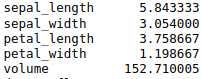

d. Novamente, calcule a média de cada atributo das flores só que agora faça-o separadamente para cada um dos tipos de íris indicados na coluna "class". 
Utilize o loop for para reduzir quantidade de linhas. <br>
Existe diferença entre as médias de cada um dos atributos das flores?

Exemplo de resposta:
[image.png](attachment:image.png)

In [158]:
classes = ["Iris-setosa", "Iris-virginica", "Iris-versicolor"]

for classe in classes:
    print(classe)
    print(tabela_dados[tabela_dados["class"]==classe].mean(axis=0))
    print()



Iris-setosa
sepal_length          5.006000
sepal_width           3.418000
petal_length          1.464000
petal_width           0.244000
Volume               38.762373
sepal_length_mean     5.006000
dtype: float64

Iris-virginica
sepal_length           6.588000
sepal_width            2.974000
petal_length           5.552000
petal_width            2.026000
Volume               258.807607
sepal_length_mean      6.588000
dtype: float64

Iris-versicolor
sepal_length           5.936000
sepal_width            2.770000
petal_length           4.260000
petal_width            1.326000
Volume               160.560036
sepal_length_mean      5.936000
dtype: float64



C:\Users\l_era\AppData\Local\Temp/ipykernel_14092/2369553689.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(tabela_dados[tabela_dados["class"]==classe].mean(axis=0))


e. Adicione uma nova coluna com o valor da média de 'sepal length' apenas para a íris da classe Iris-setosa.

In [84]:

#tabela_dados[tabela_dados["class"] =="Iris-setosa"].mean(axis=0)["sepal_length"]

tabela_dados["sepal_length_mean"]=np.nan

media = (tabela_dados[tabela_dados["class"]=="Iris-setosa"].mean(axis=0))["sepal_length"]

tabela_dados["sepal_length_mean"][tabela_dados["class"]=="Iris-setosa"]= media
tabela_dados
#tabela_dados[tabela_dados["class"]=="Iris-setosa"]["sepal_length_mean"] = tabela_dados[tabela_dados["class"]=="Iris-setosa"].mean(axis=0)["sepal_length"]




C:\Users\l_era\AppData\Local\Temp/ipykernel_14092/189052122.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  media = (tabela_dados[tabela_dados["class"]=="Iris-setosa"].mean(axis=0))["sepal_length"]
C:\Users\l_era\AppData\Local\Temp/ipykernel_14092/189052122.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabela_dados["sepal_length_mean"][tabela_dados["class"]=="Iris-setosa"]= media


,sepal_length,sepal_width,petal_length,petal_width,class,Volume,sepal_length_mean
0,5.1,3.5,1.4,0.2,Iris-setosa,38.132652,5.006
1,4.9,3.0,1.4,0.2,Iris-setosa,35.200498,5.006
2,4.7,3.2,1.3,0.2,Iris-setosa,30.072372,5.006
3,4.6,3.1,1.5,0.2,Iris-setosa,33.238050,5.006
4,5.0,3.6,1.4,0.2,Iris-setosa,36.651914,5.006
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,244.445230,NaN
146,6.3,2.5,5.0,1.9,Iris-virginica,207.816354,NaN
147,6.5,3.0,5.2,2.0,Iris-virginica,230.069302,NaN
148,6.2,3.4,5.4,2.3,Iris-virginica,217.373079,NaN



f. Adicione uma coluna com a média de 'sepal length' de tal forma que cada tipo de íris tenha seu respectivo valor de média. Utilize o loop for e faça isso sem utilizar métodos que não foram ensinados na aula de hoje.

In [88]:
for classe in classes:

    media = tabela_dados[tabela_dados["class"]==classe].mean(axis=0)["sepal_length"]

    tabela_dados["sepal_length_mean"][tabela_dados["class"]==classe] = media
    
    
print(tabela_dados)

     sepal_length  sepal_width  petal_length  petal_width           class  \
0             5.1          3.5           1.4          0.2     Iris-setosa   
1             4.9          3.0           1.4          0.2     Iris-setosa   
2             4.7          3.2           1.3          0.2     Iris-setosa   
3             4.6          3.1           1.5          0.2     Iris-setosa   
4             5.0          3.6           1.4          0.2     Iris-setosa   
..            ...          ...           ...          ...             ...   
145           6.7          3.0           5.2          2.3  Iris-virginica   
146           6.3          2.5           5.0          1.9  Iris-virginica   
147           6.5          3.0           5.2          2.0  Iris-virginica   
148           6.2          3.4           5.4          2.3  Iris-virginica   
149           5.9          3.0           5.1          1.8  Iris-virginica   

         Volume  sepal_length_mean  
0     38.132652              5.006  
1

C:\Users\l_era\AppData\Local\Temp/ipykernel_14092/328882326.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  media = tabela_dados[tabela_dados["class"]==classe].mean(axis=0)["sepal_length"]
C:\Users\l_era\AppData\Local\Temp/ipykernel_14092/328882326.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabela_dados["sepal_length_mean"][tabela_dados["class"]==classe] = media


g. Salve apenas o valor da classe, da média do sepal length e do volume desse dataset em um arquivo csv sem a coluna de index.

In [150]:

classes = tabela_dados["class"].unique()
#pd.DataFrame(my_array.reshape(-1,3), columns=['col_1','col_2','col_3'])
tabela_resumo = pd.DataFrame(classes, columns=["class"])
tabela_resumo["sepal_length_mean"]=np.nan
tabela_resumo["Volume_mean"]=np.nan
tabela_resumo["index"] = tabela_resumo["class"]

tabela_resumo = tabela_resumo.set_index("index")



for classe in tabela_resumo["class"]:
    tabela_resumo.loc[classe,"sepal_length_mean"]=(tabela_dados[tabela_dados["class"]==classe]["sepal_length"].mean())
    tabela_resumo.loc[classe,"Volume_mean"]=(tabela_dados[tabela_dados["class"]==classe]["Volume"].mean())

tabela_resumo.reset_index(inplace=True, drop=True)
tabela_resumo.to_csv("Tabela_resumo.csv")